In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
!pip3 install KMeans
from sklearn.cluster import KMeans
import pickle

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11793 sha256=4bdd5d0ac3f96d9088f083d9c4f994d01888b361ccd1a59cf9f5c19a2d2a3030
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Case_study mercedes_Manufacturing/test.csv")
X_train = train.drop(['y'],axis=1)
y_train = train['y']
X_test=test

# DATA CLUSTERING 11TH RANK APPROACH

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


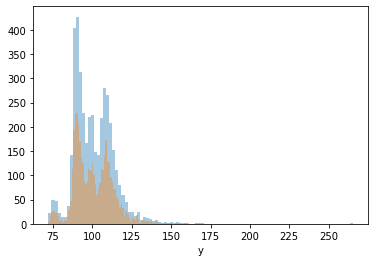

In [ ]:
display(sns.distplot(y_train ,bins=100,kde=False) , sns.distplot(y_train[y_train<170],bins=100,kde=False))

In [ ]:
zero_std = X_train.std()[X_train.std()==0].index
X_train = X_train.drop(zero_std,axis=1)
X_test = X_test.drop(zero_std,axis=1)

In [ ]:
df = pd.DataFrame(columns=['X','y'],index=X_train.index)
df['X'] =X_train['X0']
df['y'] =train['y']

In [ ]:
encoding = df.groupby('X')['y'].mean()

In [ ]:
encoding[df['X'].values][0:5]

X
k     99.491818
k     99.491818
az    78.025543
az    78.025543
az    78.025543
Name: y, dtype: float64

In [ ]:
cat=df.groupby('X')['y'].mean()
print( cat[0:5] , "top 5 categories")
clust = KMeans(4,random_state=0)
labels = clust.fit_predict(encoding[df['X']].values.reshape(-1,1))
print(len(labels))
df['labels'] = labels

X
a     115.630952
aa    152.170000
ab    112.300000
ac     89.620000
ad     94.087857
Name: y, dtype: float64 top 5 categories
4209


In [ ]:
df.head(5)

,X,y,labels
0,k,130.81,3
1,k,88.53,3
2,az,76.26,2
3,az,80.62,2
4,az,78.02,2


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


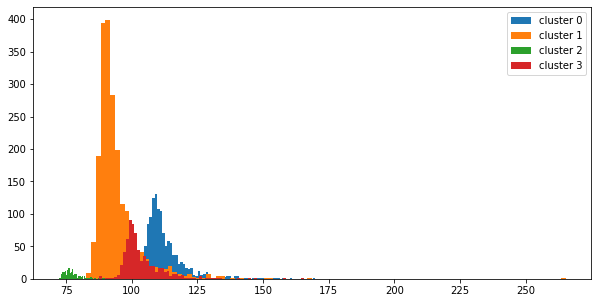

In [ ]:
%pylab inline
plt.figure(figsize(10,5))
plt.hist(df["y"].values[df["labels"]==0],bins=70,label='cluster 0')
plt.hist(df["y"].values[df["labels"]==1],bins=100,label='cluster 1')
plt.hist(df["y"].values[df["labels"]==2],bins=70,label='cluster 2')
plt.hist(df["y"].values[df["labels"]==3],bins=70,label='cluster 3')
plt.legend()

# normalizing cat features

In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/data/df_train_250+labelenc.pkl','rb') as f:
  train = pickle.load(f) 
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/data/df_test_250+labelenc.pkl','rb') as f:
  test = pickle.load(f)   

In [ ]:
train.head(5)

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,0,32,23,17,0,24,9,14,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,6,32,21,19,4,28,11,14,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53
2,7,20,24,34,2,27,9,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,76.26
3,9,20,21,34,5,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.62
4,13,20,23,34,5,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78.02


In [ ]:
test.head(2)

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385
0,1,20,23,34,5,-1,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40,3,7,0,-1,6,24,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
def normalize(df ):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
cat_features=["X0" , "X1" , "X2" , "X3" , "X5" , "X6" , "X8"]

In [ ]:
train[cat_features]=normalize(train[cat_features])
test[cat_features]=normalize(test[cat_features])

In [ ]:
display(train.head(2) , test.head(2))

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385,y
0,0,0.695652,0.884615,0.395349,0.000000,0.857143,0.818182,0.583333,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,130.81
1,6,0.695652,0.807692,0.441860,0.666667,1.000000,1.000000,0.583333,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88.53


,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X16,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X30,X32,X34,X36,X37,X38,X40,X41,X43,X45,X46,X47,X49,X50,X51,X52,X55,...,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X346,X349,X350,X351,X353,X354,X355,X356,X357,X359,X360,X361,X365,X366,X369,X373,X374,X375,X376,X377,X379,X380,X382,X383,X384,X385
0,1,0.446809,0.884615,0.795455,0.833333,0.0,0.000000,0.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.872340,0.115385,0.181818,0.000000,0.0,0.545455,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# PCA for binary features

In [ ]:
cat_features_train=["X0" , "X1" , "X2" , "X3" , "X5" , "X6" , "X8" ,"y" , "ID" ]
cat_features=["X0" , "X1" , "X2" , "X3" , "X5" , "X6" , "X8" ,"ID" ]
################################################################################
from sklearn.decomposition import PCA
pca = PCA(n_components=10)              # no. of component 10
x=train.drop(cat_features_train , axis=1)
train_pca = pca.fit_transform(train.drop(cat_features_train , axis=1))
test_pca = pca.fit_transform(test.drop(cat_features , axis=1))
################################################################################
print("shape of PCA:", train_pca.shape , test_pca.shape)  #printing shape of PCA
################################################################################
train_pca[0]                             #printing train PCA[0]

shape of PCA: (4209, 10) (4209, 10)


array([ 1.04830658, -0.55487981,  2.31082913,  0.34190769,  1.18940792,
       -0.41499107, -0.11748058,  0.93096303,  1.21592711,  0.2142965 ])

In [ ]:
train_pca[0]

array([ 1.04830659, -0.55487966,  2.31082942,  0.34190774,  1.18940991,
       -0.41499488, -0.11745969,  0.93085218,  1.21741908,  0.21454695])

# SVD for binary features

In [ ]:
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=10, random_state=42)
model= svd.fit(x)
################################################################
train_svd=model.transform(x)
U = train_svd / svd.singular_values_
Sigma_matrix = np.diag(svd.singular_values_)
VT = svd.components_
test_svd = svd.transform(test.drop(cat_features , axis=1))
##################################################################
df_train_final=np.hstack((train_pca,train_svd ,train ))
df_test_final=np.hstack((test_pca ,test_svd,test))
df_train_final.shape , df_test_final.shape

((4209, 278), (4209, 277))

In [ ]:
df_train_final=np.hstack((train_pca,train_svd ,train ))
df_test_final=np.hstack((test_pca ,test_svd,test))
df_train_final.shape , df_test_final.shape

((4209, 278), (4209, 277))

In [ ]:
train_pca.shape,train_svd.shape ,train.shape

((4209, 10), (4209, 10), (4209, 258))

In [ ]:
test_pca.shape ,test_svd.shape,test.shape

((4209, 10), (4209, 10), (4209, 258))

In [ ]:
with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/data/df_train_FE.pkl','wb') as f:
  pickle.dump(df_train_final, f) 


with open('/content/drive/MyDrive/Case_study mercedes_Manufacturing/data/df_test_FE.pkl','wb') as f:
  pickle.dump(df_test_final, f)